# Consolidated test notebook

In [1]:
import sys
sys.path.insert(1, '..')
from importlib import reload

In [2]:
import cocoa.cocoa as cc
import cocoa.covid19 as coco

In [311]:
reload(coco)
reload(cc)

<module 'cocoa.cocoa' from '../cocoa/cocoa.py'>

In [ ]:
help(cc)

In [ ]:
help(cc.get)

In [300]:
cc.get(where='french',which='confirmed',what='Diff')

../cocoa/geo.py:115: UserWarning: Caution. More than one country match the key "french" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


array([    0,     0,     2,     1,     0,     0,     1,     1,     0,
           0,     1,     0,     0,     0,     0,     0,     0,     5,
           0,     0,     0,     0,     0,     0,     1,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     2,     4,
          20,    19,    43,    30,    61,    13,    84,    92,   276,
         303,   177,    83,   575,   499,     0,  1388,   815,    36,
        2151,  1032,  1409,  1846,  1788,  1705,  1780,  3880,  2499,
        2978,  3951,  3851,  4703,  2603,  4462,  7657,  4922,  2180,
        5273,  4298,  1912,  3931,  3820,  3894,  4309,  4372,  3125,
       26849,  3682,  4971,  3220, 12490,  2009,     2,  4925,  2382,
        2775, -2188,  2323,  1649,  1692,   576,  3743,  3090, -2510,
         756,     6,  1213,   407,   658,  1104,  3537,   694,  1284,
         580,   312,   453,   802,  -165,   810,   636,     0,    63,
         358,   882,   767,   251,   403,   340,    15,   358,  -220,
         191,  3326,

../cocoa/geo.py:115: UserWarning: Caution. More than one country match the key "french" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  if db:


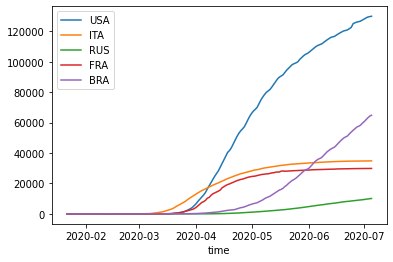

In [321]:
cc.plot(where=['united states','IT','russia','french','brazil'],which='deaths',what='Cumul',yscale='lin') # Caution, Cumul will become cumul (lower case)

In [6]:
cc.listwhat()

['Cumul', 'Diff', 'cumul', 'daily', 'weekly']

In [7]:
cc.listwhom()

['JHU', 'SPF']

In [8]:
cc.listwhich()

['deaths', 'confirmed', 'recovered']

In [9]:
cc.setwhom('JHU')

../cocoa/cocoa.py:84: UserWarning: cocoa.setbase() function not yet fully implemented
  warnings.warn("cocoa.setbase() function not yet fully implemented")


['deaths', 'confirmed', 'recovered']

# Sandbox

In [2]:
from importlib import reload

In [11]:
reload(cc)
reload(cocoa.error)

NameError: name 'cocoa' is not defined

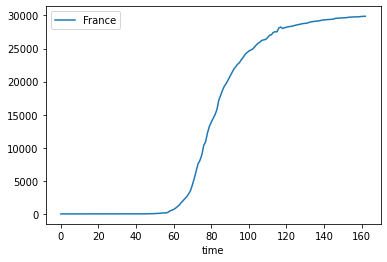

In [2]:
cc.plot(where='France',which='deaths',what='Cumul')

In [17]:
from cocoa.error import *

try:
    cc.plot(where=['US','Brazil'],which='something',what='Diff')
except CocoaError as ce:
    print(type(ce))
    print(ce)

<class 'cocoa.error.CocoaKeyError'>
'Which option something not supported. See listwhich() for list.'


In [30]:
import cocoa.covid19 as coco

In [31]:
c=coco.JHUCSSEdata()

In [41]:
cc=[k for k in c.getRawData()['deaths']['Country/Region']]

In [120]:
import cocoa.world as cw
ww=cw.WorldInfo()

In [133]:
ccw=[k for k in ww.getData()["Country"]]
ccw

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt',
 'Vietnam',
 'DR Congo',
 'Turkey',
 'Iran',
 'Germany',
 'Thailand',
 'United Kingdom',
 'France',
 'Italy',
 'Tanzania',
 'South Africa',
 'Myanmar',
 'Kenya',
 'South Korea',
 'Colombia',
 'Spain',
 'Uganda',
 'Argentina',
 'Algeria',
 'Sudan',
 'Ukraine',
 'Iraq',
 'Afghanistan',
 'Poland',
 'Canada',
 'Morocco',
 'Saudi Arabia',
 'Uzbekistan',
 'Peru',
 'Angola',
 'Malaysia',
 'Mozambique',
 'Ghana',
 'Yemen',
 'Nepal',
 'Venezuela',
 'Madagascar',
 'Cameroon',
 "Côte d'Ivoire",
 'North Korea',
 'Australia',
 'Niger',
 'Taiwan',
 'Sri Lanka',
 'Burkina Faso',
 'Mali',
 'Romania',
 'Malawi',
 'Chile',
 'Kazakhstan',
 'Zambia',
 'Guatemala',
 'Ecuador',
 'Syria',
 'Netherlands',
 'Senegal',
 'Cambodia',
 'Chad',
 'Somalia',
 'Zimbabwe',
 'Guinea',
 'Rwanda',
 'Benin',
 'Burundi',
 'Tunisia',
 'Bolivia',
 'Belgiu

In [24]:
reload(cg)
G=cg.GeoManager('name')

In [190]:
G.set_standard('name')
G.to_standard(ccw,output='dict',db='worldometers')

{'China': 'China',
 'India': 'India',
 'United States': 'United States',
 'Indonesia': 'Indonesia',
 'Pakistan': 'Pakistan',
 'Brazil': 'Brazil',
 'Nigeria': 'Nigeria',
 'Bangladesh': 'Bangladesh',
 'Russia': 'Russian Federation',
 'Mexico': 'Mexico',
 'Japan': 'Japan',
 'Ethiopia': 'Ethiopia',
 'Philippines': 'Philippines',
 'Egypt': 'Egypt',
 'Vietnam': 'Viet Nam',
 'DR Congo': 'Congo, The Democratic Republic of the',
 'Turkey': 'Turkey',
 'Iran': 'Iran, Islamic Republic of',
 'Germany': 'Germany',
 'Thailand': 'Thailand',
 'United Kingdom': 'United Kingdom',
 'France': 'France',
 'Italy': 'Italy',
 'Tanzania': 'Tanzania, United Republic of',
 'South Africa': 'South Africa',
 'Myanmar': 'Myanmar',
 'Kenya': 'Kenya',
 'South Korea': 'Korea, Republic of',
 'Colombia': 'Colombia',
 'Spain': 'Spain',
 'Uganda': 'Uganda',
 'Argentina': 'Argentina',
 'Algeria': 'Algeria',
 'Sudan': 'Sudan',
 'Ukraine': 'Ukraine',
 'Iraq': 'Iraq',
 'Afghanistan': 'Afghanistan',
 'Poland': 'Poland',
 'Canada

In [35]:
reload(coco)

<module 'cocoa.covid19' from '../cocoa/covid19.py'>

In [329]:
import pycountry
pycountry.countries.search_fuzzy('mol')

[Country(alpha_2='MD', alpha_3='MDA', common_name='Moldova', name='Moldova, Republic of', numeric='498', official_name='Republic of Moldova'),
 Country(alpha_2='IT', alpha_3='ITA', name='Italy', numeric='380', official_name='Italian Republic'),
 Country(alpha_2='BG', alpha_3='BGR', name='Bulgaria', numeric='100', official_name='Republic of Bulgaria'),
 Country(alpha_2='RU', alpha_3='RUS', name='Russian Federation', numeric='643'),
 Country(alpha_2='UG', alpha_3='UGA', name='Uganda', numeric='800', official_name='Republic of Uganda'),
 Country(alpha_2='KZ', alpha_3='KAZ', name='Kazakhstan', numeric='398', official_name='Republic of Kazakhstan')]

In [63]:
import pycountry_convert as pcc

In [46]:
pdc

,country,continent,continent name,here
0,AW,NA,North America,AW
1,AF,AS,Asia,AF
2,AO,AF,Africa,AO
3,AI,NA,North America,AI
4,AX,EU,Europe,AX
...,...,...,...,...
236,WS,OC,Oceania,WS
237,YE,AS,Asia,YE
238,ZA,AF,Africa,ZA
239,ZM,AF,Africa,ZM


In [75]:
from pycountry_convert.convert_continent_code_to_continent_name import CONTINENT_CODE_TO_CONTINENT_NAME

In [83]:
CONTINENT_CODE_TO_CONTINENT_NAME

AttributeError: 'dict' object has no attribute 'append'

In [ ]:
pcc.convert_countries

In [8]:
import cocoa.geo as cg
reload(cg)

<module 'cocoa.geo' from '../cocoa/geo.py'>

In [12]:
r=cg.GeoRegion()
g=cg.GeoManager('name')
i=cg.GeoInfo()

In [13]:
i.get_list_field()

['area',
 'continent_code',
 'continent_name',
 'country_name',
 'fertility',
 'geometry',
 'median_age',
 'population',
 'urban_rate']

In [14]:
i.get_source('geometry')

'geometry : https://github.com/johan/world.geo.json/'

In [15]:
i.get_source('median_age')

'median_age : https://www.worldometers.info/world-population/population-by-country/'

In [10]:
r.get_region_list()

{'AS': 'Asia',
 'EU': 'Europe',
 'NA': 'North America',
 'SA': 'South America',
 'AF': 'Africa',
 'OC': 'Oceania',
 'AN': 'Antarctica',
 'UE': 'European Union',
 'WW': 'Whole world'}

In [159]:
from pycountry_convert.convert_country_alpha2_to_continent_code import COUNTRY_ALPHA2_TO_CONTINENT_CODE
COUNTRY_ALPHA2_TO_CONTINENT_CODE

{'AB': 'AS',
 'AD': 'EU',
 'AE': 'AS',
 'AF': 'AS',
 'AG': 'NA',
 'AI': 'NA',
 'AL': 'EU',
 'AM': 'AS',
 'AO': 'AF',
 'AR': 'SA',
 'AS': 'OC',
 'AT': 'EU',
 'AU': 'OC',
 'AW': 'NA',
 'AX': 'EU',
 'AZ': 'AS',
 'BA': 'EU',
 'BB': 'NA',
 'BD': 'AS',
 'BE': 'EU',
 'BF': 'AF',
 'BG': 'EU',
 'BH': 'AS',
 'BI': 'AF',
 'BJ': 'AF',
 'BL': 'NA',
 'BM': 'NA',
 'BN': 'AS',
 'BO': 'SA',
 'BQ': 'NA',
 'BR': 'SA',
 'BS': 'NA',
 'BT': 'AS',
 'BV': 'AN',
 'BW': 'AF',
 'BY': 'EU',
 'BZ': 'NA',
 'CA': 'NA',
 'CC': 'AS',
 'CD': 'AF',
 'CF': 'AF',
 'CG': 'AF',
 'CH': 'EU',
 'CI': 'AF',
 'CK': 'OC',
 'CL': 'SA',
 'CM': 'AF',
 'CN': 'AS',
 'CO': 'SA',
 'CR': 'NA',
 'CU': 'NA',
 'CV': 'AF',
 'CW': 'NA',
 'CX': 'AS',
 'CY': 'AS',
 'CZ': 'EU',
 'DE': 'EU',
 'DJ': 'AF',
 'DK': 'EU',
 'DM': 'NA',
 'DO': 'NA',
 'DZ': 'AF',
 'EC': 'SA',
 'EE': 'EU',
 'EG': 'AF',
 'ER': 'AF',
 'ES': 'EU',
 'ET': 'AF',
 'FI': 'EU',
 'FJ': 'OC',
 'FK': 'SA',
 'FM': 'OC',
 'FO': 'EU',
 'FR': 'EU',
 'GA': 'AF',
 'GB': 'EU',
 'GD': 'NA',

In [11]:
g.to_standard(r.get_countries_from_region('EU'))

['Andorra',
 'Albania',
 'Austria',
 'Åland Islands',
 'Bosnia and Herzegovina',
 'Belgium',
 'Bulgaria',
 'Belarus',
 'Switzerland',
 'Czechia',
 'Germany',
 'Denmark',
 'Estonia',
 'Spain',
 'Finland',
 'Faroe Islands',
 'France',
 'United Kingdom',
 'Guernsey',
 'Gibraltar',
 'Greece',
 'Croatia',
 'Hungary',
 'Ireland',
 'Isle of Man',
 'Iceland',
 'Italy',
 'Jersey',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Monaco',
 'Moldova, Republic of',
 'Montenegro',
 'North Macedonia',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Russian Federation',
 'Sweden',
 'Slovenia',
 'Svalbard and Jan Mayen',
 'Slovakia',
 'San Marino',
 'Ukraine']

In [44]:
help(pcc)

Help on package pycountry_convert:

NAME
    pycountry_convert

DESCRIPTION
    # -*- coding: utf-8 -*-
    #  @copyright 2018 TUNE, Inc. (http://www.tune.com)
    #  @namespace pycountry-convert

PACKAGE CONTENTS
    convert_continent_code_to_continent_name
    convert_countries
    convert_country_alpha2_to_continent_code
    country_mappings
    country_name_format
    country_wikipedia

DATA
    COUNTRY_NAME_FORMAT_DEFAULT = 'default'
    COUNTRY_NAME_FORMAT_LOWER = 'lower'
    COUNTRY_NAME_FORMAT_UPPER = 'upper'
    WIKIPEDIA_COUNTRY_NAME_TO_COUNTRY_ALPHA2 = {'Afghanistan': 'AF', 'Alba...
    __copyright__ = 'Copyright 2018 TUNE, Inc.'
    __license__ = 'MIT License'
    __title__ = 'pycountry-convert'
    __version_info__ = ('0', '7', '2')

VERSION
    0.7.2

AUTHOR
    jefft@tune.com

FILE
    /home/beau/.local/lib/python3.8/site-packages/pycountry_convert/__init__.py




In [69]:
allc=pcc.country_mappings.list_country_alpha2()
ccont=[]
lcont=[]
lcontn=[]
bof=[]
for k in allc:
    try:
        lcont.append(pcc.country_alpha2_to_continent_code(k))
        lcontn.append(pcc.convert_continent_code_to_continent_name(lcont[-1]))
        ccont.append(k)
    except:
        bof.append(k)
G.to_standard(bof,output='dict')

{'AQ': 'Antarctica',
 'TF': 'French Southern Territories',
 'EH': 'Western Sahara',
 'PN': 'Pitcairn',
 'SX': 'Sint Maarten (Dutch part)',
 'TL': 'Timor-Leste',
 'UM': 'United States Minor Outlying Islands',
 'VA': 'Holy See (Vatican City State)'}

In [26]:
import pandas as pd
pdc=pd.DataFrame({"country":ccont,"continent":lcont,"continent name":lcontn})
pdc

,country,continent,continent name
0,AW,NA,North America
1,AF,AS,Asia
2,AO,AF,Africa
3,AI,NA,North America
4,AX,EU,Europe
...,...,...,...
236,WS,OC,Oceania
237,YE,AS,Asia
238,ZA,AF,Africa
239,ZM,AF,Africa


In [338]:
contlist=pdc.continent.unique()
[(c,pcc.convert_continent_code_to_continent_name(c)) for c in contlist]

[('NA', 'North America'),
 ('AS', 'Asia'),
 ('AF', 'Africa'),
 ('EU', 'Europe'),
 ('SA', 'South America'),
 ('OC', 'Oceania'),
 ('AN', 'Antarctica')]

In [341]:
d={'a':1,'b':2}
list(d.keys())
d['a']

1

In [13]:
z=((1,2),(3,4))
[x[0] for x in z]

[1, 3]

In [34]:
import cocoa.geo as cg
reload(cg)

<module 'cocoa.geo' from '../cocoa/geo.py'>

In [35]:
info=cg.GeoInfo()

In [31]:
info.get_list_field()

['area',
 'continent_code',
 'continent_name',
 'country_name',
 'fertility',
 'geometry',
 'median_age',
 'population',
 'urban_rate']

In [526]:
info.get_source('continent_code')

'continent_code : pycountry_convert (https://pypi.org/project/pycountry-convert/)'

In [527]:
help(info.add_field)

Help on method add_field in module cocoa.geo:

add_field(**kwargs) method of cocoa.geo.GeoInfo instance
    this is the main function of the GeoInfo class. It adds to 
    the input pandas dataframe some fields according to 
    the country field of input. 
    The return value is the pandas dataframe.
    
    Arguments :
    field    -- should be given as a string of list of strings and 
                should be valid fields (see get_list_field() )
                Mandatory.
    input    -- provide the input pandas dataframe. Mandatory.
    geofield -- provide the field name in the pandas where the
                location is stored. Default : 'country'
    overload -- Allow to overload a field. Boolean value. 
                Default : False



In [36]:
pdc['here']=pdc['country']
pdc2=pdc[['here','continent']][0:10]
pdc2

,here,continent
0,AW,NA
1,AF,AS
2,AO,AF
3,AI,NA
4,AX,EU
5,AL,EU
6,AD,EU
7,AE,AS
8,AR,SA
9,AM,AS


In [38]:
pdc2=info.add_field(input=pdc2,field=['continent_name','geometry','continent_code','median_age','area','population','country_name','fertility','urban_rate'],geofield='here',overload=True)
pdc2

,here,continent,continent_name,geometry,continent_code,median_age,area,population,country_name,fertility,urban_rate
0,AW,NA,North America,None,NA,41,180.0,106766.0,Aruba,1.9,44 %
1,AF,AS,Asia,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",AS,18,652860.0,38928346.0,Afghanistan,4.6,25 %
2,AO,AF,Africa,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",AF,17,1246700.0,32866272.0,Angola,5.6,67 %
3,AI,NA,North America,None,NA,N.A.,90.0,15003.0,Anguilla,N.A.,N.A.
4,AX,EU,Europe,None,EU,NaN,NaN,NaN,Åland Islands,NaN,NaN
5,AL,EU,Europe,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",EU,36,27400.0,2877797.0,Albania,1.6,63 %
6,AD,EU,Europe,None,EU,N.A.,470.0,77265.0,Andorra,N.A.,88 %
7,AE,AS,Asia,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",AS,33,83600.0,9890402.0,United Arab Emirates,1.4,86 %
8,AR,SA,South America,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",SA,32,2736690.0,45195774.0,Argentina,2.3,93 %
9,AM,AS,Asia,"POLYGON ((43.58275 41.09214, 44.97248 41.24813...",AS,35,28470.0,2963243.0,Armenia,1.8,63 %


In [658]:
info.get_source('population')

'population : https://www.worldometers.info/world-population/population-by-country/'

In [659]:
info.get_source('geometry')

'geometry : https://github.com/johan/world.geo.json/'

In [664]:
info.get_list_field()

['area',
 'continent_code',
 'continent_name',
 'country_name',
 'geometry',
 'population']

In [619]:
pdc2=info.add_field(input=pdc2,field=['population','surface'],geofield='here',overload=True)
pdc2

../cocoa/geo.py:150: UserWarning: Caution. More than one country match the key "Sint Maarten" : ['Netherlands, ', 'Sint Maarten (Dutch part), '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


,here,continent,population,surface
0,AW,NA,106766.0,0
1,AF,AS,38928346.0,0
2,AO,AF,32866272.0,0
3,AI,NA,15003.0,0
4,AX,EU,NaN,0
5,AL,EU,2877797.0,0
6,AD,EU,77265.0,0
7,AE,AS,9890402.0,0
8,AR,SA,45195774.0,0
9,AM,AS,2963243.0,0


In [587]:
info._data_population

,country,Population,Area
0,1,China,1439323776
1,2,India,1380004385
2,3,United States,331002651
3,4,Indonesia,273523615
4,5,Pakistan,220892340
...,...,...,...
230,231,Montserrat,4992
231,232,Falkland Islands,3480
232,233,Niue,1626
233,234,Tokelau,1357


In [486]:
pcc.country_wikipedia.WIKIPEDIA_COUNTRY_NAME_TO_COUNTRY_ALPHA2_NOT_ISO

{'Abkhazia': 'AB', 'Kosovo': 'XK', 'South Ossetia': 'OS'}

In [545]:
pd.DataFrame().empty

True

In [243]:
[G.to_standard(k,output='dict') for k in pdc[pdc.continent=='EU'].country]

[{'A': 'Åland Islands'},
 {'A': 'Albania'},
 {'A': 'Andorra'},
 {'A': 'Austria'},
 {'B': 'Belgium'},
 {'B': 'Bulgaria'},
 {'B': 'Bosnia and Herzegovina'},
 {'B': 'Belarus'},
 {'C': 'Switzerland'},
 {'C': 'Czechia'},
 {'D': 'Germany'},
 {'D': 'Denmark'},
 {'E': 'Spain'},
 {'E': 'Estonia'},
 {'F': 'Finland'},
 {'F': 'France'},
 {'F': 'Faroe Islands'},
 {'G': 'United Kingdom'},
 {'G': 'Guernsey'},
 {'G': 'Gibraltar'},
 {'G': 'Greece'},
 {'H': 'Croatia'},
 {'H': 'Hungary'},
 {'I': 'Isle of Man'},
 {'I': 'Ireland'},
 {'I': 'Iceland'},
 {'I': 'Italy'},
 {'J': 'Jersey'},
 {'L': 'Liechtenstein'},
 {'L': 'Lithuania'},
 {'L': 'Luxembourg'},
 {'L': 'Latvia'},
 {'M': 'Monaco'},
 {'M': 'Moldova, Republic of'},
 {'M': 'North Macedonia'},
 {'M': 'Malta'},
 {'M': 'Montenegro'},
 {'N': 'Netherlands'},
 {'N': 'Norway'},
 {'P': 'Poland'},
 {'P': 'Portugal'},
 {'R': 'Romania'},
 {'R': 'Russian Federation'},
 {'S': 'Svalbard and Jan Mayen'},
 {'S': 'San Marino'},
 {'R': 'Serbia'},
 {'S': 'Slovakia'},
 {'S'

In [195]:
mydb=coco.db('JHU')
mydb.getFields()

['deaths', 'confirmed', 'recovered']

In [58]:
import cocoa.geo as cg
import cocoa.error as error

In [92]:
reload(cg)
reload(error)

<module 'cocoa.error' from '../cocoa/error.py'>

In [67]:
G=cg.GeoManager('iso3')

In [ ]:
G.to

In [68]:
G.first_db_translation(['Congo (Kinshasa)'],'JHU')

['Democratic Republic of the Congo']

In [69]:
G.first_db_translation(['Congo (Brazzaville)'],'JHU')

['Republic of the Congo']

In [24]:
G.get_standard()

'iso3'

In [136]:
G.get_list_standard()

['iso2', 'iso3', 'name', 'num']

In [137]:
G.to_standard(['FRA','Spain','england'],output='list')

['FRA', 'ESP', 'GBR']

In [138]:
G.to_standard(['FRA','Spain','england'],output='dict')

{'FRA': 'FRA', 'Spain': 'ESP', 'england': 'GBR'}

In [139]:
G.to_standard(['FRA','Spain','england'],output='pandas')

,inputname,iso3
0,FRA,FRA
1,Spain,ESP
2,england,GBR


In [140]:
G.to_standard(['spain','uk','united states of america','kosovo'])

../cocoa/geo.py:85: UserWarning: Caution. More than one country match the key "uk" : ['Ukraine, ', 'Latvia, ', 'Uganda, ', 'Albania, ', 'Japan, ', 'Thailand, ', 'Tuvalu, ', 'Indonesia, ', 'Canada, ', 'Croatia, ', 'Philippines, ', 'Slovenia, ', 'Tanzania, United Republic of, ', 'Algeria, ', "Korea, Democratic People's Republic of, ", 'Korea, Republic of, ', 'Russian Federation, ', 'Bhutan, ', 'Micronesia, Federated States of, ', 'Iraq, ', 'Marshall Islands, ', 'Saudi Arabia, ', 'Dominica, ', 'Egypt, ', 'Cambodia, ', 'Morocco, ', 'Turkey, '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


['ESP', 'UKR', 'USA', 'SRB']

In [141]:
G.to_standard([250])

['FRA']

In [142]:
G.set_standard('num')

'num'

In [143]:
G.to_standard('fra')

['250']

In [145]:
G.set_standard('name')
G.to_standard('french')

../cocoa/geo.py:85: UserWarning: Caution. More than one country match the key "french" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


['France']

In [7]:
import cocoa.world as cowo

In [18]:
reload(cowo)
reload(error)

<module 'cocoa.error' from '../cocoa/error.py'>

In [20]:
w=cowo.WorldInfo()

In [599]:
import pycountry
pycountry.countries.search_fuzzy('martin')

[Country(alpha_2='MQ', alpha_3='MTQ', name='Martinique', numeric='474'),
 Country(alpha_2='MF', alpha_3='MAF', name='Saint Martin (French part)', numeric='663'),
 Country(alpha_2='FR', alpha_3='FRA', name='France', numeric='250', official_name='French Republic'),
 Country(alpha_2='PE', alpha_3='PER', name='Peru', numeric='604', official_name='Republic of Peru'),
 Country(alpha_2='TT', alpha_3='TTO', name='Trinidad and Tobago', numeric='780', official_name='Republic of Trinidad and Tobago')]

TypeError: Only one criteria may be given

In [29]:
G.set_standard('name')
G.to_standard(w.getAfricaCountries(),'dict')

CocoaLookupError: No country match the key "Congo (Brazzaville)". Error.

In [82]:
import pandas as pd
ts = pd.Series(z.cases.to_numpy(), index=z.date)
type(ts)

pandas.core.series.Series

In [84]:
ts1=pd.Series(z[z.country=="Spain"].cases.to_numpy(), index=z[z.country=="Spain"].date)
ts2=pd.Series(z[z.country=="Italy"].cases.to_numpy(), index=z[z.country=="Italy"].date)

In [92]:
zz=pd.DataFrame({"country":z.country.unique(),"ts":[ts1,ts2]})
zz.head()

,country,ts
0,Italy,date 2020-01-22 0 2020-01-23 0 2...
1,Spain,date 2020-01-22 0 2020-01-23 0 2...


In [98]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Grid, Line, LinearAxis, Plot
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [99]:
fig=figure()

In [110]:
fig.line(x='date',y='cases',source=z)
show(fig)

# Other stuff. Oliv' branch

# Other tests

In [16]:
import pandas as pd
p_un=pd.read_html('https://en.wikipedia.org/wiki/UN_M49')
p_co=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme')
p_un[1].columns[0,1]=['code','region']

In [70]:
p_un[1]['region2']=[r.split('(')[0] for r in p_un[1].region]
p_un[1]

,code,region,region2
0,1,World,World
1,2,Africa,Africa
2,15,Northern Africa,Northern Africa
3,202,Sub-Saharan Africa,Sub-Saharan Africa
4,14,Eastern Africa,Eastern Africa
5,17,Middle Africa,Middle Africa
6,18,Southern Africa,Southern Africa
7,11,Western Africa,Western Africa
8,19,Americas,Americas
9,419,Latin America and the Caribbean,Latin America and the Caribbean


In [32]:
p_co[0]

ISO 3166 -1[2]     Capital  \
        Country/region     Capital   
0              Algeria     Algiers   
1                Egypt       Cairo   
2                Libya     Tripoli   
3              Morocco       Rabat   
4                Sudan    Khartoum   
..                 ...         ...   
244              Samoa        Apia   
245            Tokelau     Fakaofo   
246              Tonga  Nukuʻalofa   
247             Tuvalu    Funafuti   
248  Wallis and Futuna    Mata-Utu   

                                            ISO 3166-1                \
                                            Alpha-2[2] Alpha-3[1][2]   
0    .mw-parser-output .monospaced{font-family:mono...           DZA   
1                                                   EG           EGY   
2                                                   LY           LBY   
3                                                   MA           MAR   
4                                                   SD           SDN   
..                                                 ...           ...   
244                                                 WS           WSM   
245                                                 TK           TKL   
246                                                 TO           TON   
247                                                 TV           TUV   
248                                                 WF           WLF   

                  UN M.49 codes[1]  
    Numeric[1][2] UN M.49 codes[1]  
0              12  015 < 002 < 001  
1             818  015 < 002 < 001  
2             434  015 < 002 < 001  
3             504  015 < 002 < 001  
4             729  015 < 002 < 001  
..            ...              ...  
244           882  061 < 009 < 001  
245           772  061 < 009 < 001  
246           776  061 < 009 < 001  
247           798  061 < 009 < 001  
248           876  061 < 009 < 001  

[249 rows x 6 columns]

In [58]:
p_co[0].columns=['country','capital','iso2','iso3','num','m49']

id=[]
reg=[]
cap=[]
for index, row in p_co[0].iterrows():
    for r in row.m49.replace(" ","").split('<'):
        id.append(row.iso3)
        reg.append(int(r))
        cap.append(row.capital)
pco=pd.DataFrame({'id':id,'capital':cap,'region':reg})
pco.head()

,id,capital,region
0,DZA,Algiers,15
1,DZA,Algiers,2
2,DZA,Algiers,1
3,EGY,Cairo,15
4,EGY,Cairo,2


In [61]:
pp=pco.merge(p_un[1],left_on='region',right_on='code',how='left')
pp.head()

,id,capital,region_x,code,region_y
0,DZA,Algiers,15,15.0,Northern Africa
1,DZA,Algiers,2,2.0,Africa
2,DZA,Algiers,1,1.0,World
3,EGY,Cairo,15,15.0,Northern Africa
4,EGY,Cairo,2,2.0,Africa


In [72]:
pp[pp.id=='FRA']

,id,capital,region_x,code,region_y
786,FRA,Paris,155,155.0,Western Europe
787,FRA,Paris,150,150.0,Europe
788,FRA,Paris,1,1.0,World


In [77]:
import cocoa.geo as cg
reload(cg)

<module 'cocoa.geo' from '../cocoa/geo.py'>

In [78]:
gr=cg.GeoRegion()
gr.get_region_list()

['World',
 'Africa',
 'Northern Africa',
 'Sub-Saharan Africa',
 'Eastern Africa',
 'Middle Africa',
 'Southern Africa',
 'Western Africa',
 'Americas',
 'Latin America and the Caribbean',
 'Caribbean',
 'Central America',
 'South America',
 'North America',
 'Northern America',
 'Asia',
 'Central Asia',
 'Eastern Asia',
 'South-eastern Asia',
 'Southern Asia',
 'Western Asia',
 'Europe',
 'Eastern Europe',
 'Northern Europe',
 'Southern Europe',
 'Western Europe',
 'Oceania',
 'Australia and New Zealand',
 'Melanesia',
 'Micronesia',
 'Polynesia',
 'European Union']

In [79]:
gr.get_pandas()

,iso3,capital,region,region_name
0,DZA,Algiers,15,Northern Africa
1,DZA,Algiers,2,Africa
2,DZA,Algiers,1,World
3,EGY,Cairo,15,Northern Africa
4,EGY,Cairo,2,Africa
...,...,...,...,...
885,TUV,Funafuti,9,Oceania
886,TUV,Funafuti,1,World
887,WLF,Mata-Utu,61,Polynesia
888,WLF,Mata-Utu,9,Oceania


In [80]:
gr.get_countries_from_region('North America')

['ABW',
 'AIA',
 'ATG',
 'BES',
 'BHS',
 'BLM',
 'BLZ',
 'BMU',
 'BRB',
 'CAN',
 'CRI',
 'CUB',
 'CUW',
 'CYM',
 'DMA',
 'DOM',
 'GLP',
 'GRD',
 'GRL',
 'GTM',
 'HND',
 'HTI',
 'JAM',
 'KNA',
 'LCA',
 'MAF',
 'MEX',
 'MSR',
 'MTQ',
 'NIC',
 'PAN',
 'PRI',
 'SLV',
 'SPM',
 'SXM',
 'TCA',
 'TTO',
 'USA',
 'VCT',
 'VGB',
 'VIR']

In [84]:
gm=cg.GeoManager('name')
gm.to_standard(gr.get_countries_from_region('Southern Europe'))

['Albania',
 'Andorra',
 'Bosnia and Herzegovina',
 'Spain',
 'Gibraltar',
 'Greece',
 'Croatia',
 'Italy',
 'North Macedonia',
 'Malta',
 'Montenegro',
 'Portugal',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Holy See (Vatican City State)']

In [111]:
import cocoa.cocoa as coco
reload(coco)

<module 'cocoa.cocoa' from '../cocoa/cocoa.py'>

In [94]:
help(coco.get)

Help on function get in module cocoa.cocoa:

get(**kwargs)
    Return covid19 data in specified format output (default, by list) 
    for specified locations ('where' keyword). 
    The used database is set by the setbase() function but can be
    changed on the fly ('whom' keyword)
    
    Keyword arguments
    -----------------
    
    where  --   a single string of location, or list of (mandatory, 
                no default value)
    what   --   what sort of data to deliver ( 'death','confirmed',
                'recovered' …). See listwhat() function for full
                list according to the used database.
    which  --   which data are computed, either in cumulative mode 
                ( 'cumul', default value) or 'daily' or other. See 
                listwhich() for fullist of available 
                Full list of which keyword with the listwhich() function.
    whom   --   Database specification (overload the setbase() 
                function). See listwhom() for

In [96]:
coco.listwhat()

['Cumul', 'Diff', 'cumul', 'daily', 'weekly']

In [127]:
p=coco.get(where=['FR','IT'],output='pandas')
pmax=p[p["date"]==p["date"].max()]
pmax.head()

,country,date,cases
168,FRA,2020-07-08,29936
337,ITA,2020-07-08,34914


In [125]:
info=cg.GeoInfo()

In [132]:
pmax=info.add_field(input=pmax,geofield='country',field='geometry',overload=True)
pmax.head()

,country,date,cases,geometry
0,FRA,2020-07-08,29936,"MULTIPOLYGON (((9.56002 42.15249, 9.22975 41.3..."
1,ITA,2020-07-08,34914,"MULTIPOLYGON (((15.52038 38.23116, 15.16024 37..."


In [42]:
from bokeh.io import output_notebook, show

In [35]:
output_notebook()

Loading BokehJS ...

In [145]:
import cocoa.geo as cg
reload(cg)

<module 'cocoa.geo' from '../cocoa/geo.py'>

In [146]:
gm=cg.GeoManager()
gr=cg.GeoRegion()
gi=cg.GeoInfo()

In [118]:
help(gm)

Help on GeoManager in module cocoa.geo object:

class GeoManager(builtins.object)
 |  GeoManager(standard='iso2')
 |  
 |  GeoManager class definition. No inheritance from any other class.
 |  
 |  It should raise only CocoaError and derived exceptions in case 
 |  of errors (see cocoa.error)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, standard='iso2')
 |      __init__ member function, with default definition of 
 |      the used standard. To get the current default standard, 
 |      see get_list_standard()[0].
 |  
 |  first_db_translation(self, w, db)
 |      This function helps to translate from country name to 
 |      standard for specific databases. It's the first step
 |      before final translation. 
 |      
 |      One can easily add some database support adding some new rules
 |      for specific databases
 |  
 |  get_list_db(self)
 |      return supported list of database name for translation of 
 |      country names to standard.
 |  
 |  get_list_output(self

In [137]:
gm.set_standard('name')
gm.to_standard(gr.get_countries_from_region('European Union'))

['Austria',
 'Belgium',
 'Bulgaria',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'Greece',
 'Croatia',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Sweden']

In [139]:
import cocoa.cocoa as coco
reload(coco)
p=coco.get(where='french',output='pandas')

../cocoa/geo.py:152: UserWarning: Caution. More than one country match the key "french" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


In [157]:
gi.get_source()

{'continent_code': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'continent_name': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'country_name': 'pycountry_convert (https://pypi.org/project/pycountry-convert/)',
 'population': 'https://www.worldometers.info/world-population/population-by-country/',
 'area': 'https://www.worldometers.info/world-population/population-by-country/',
 'fertility': 'https://www.worldometers.info/world-population/population-by-country/',
 'median_age': 'https://www.worldometers.info/world-population/population-by-country/',
 'urban_rate': 'https://www.worldometers.info/world-population/population-by-country/',
 'geometry': 'https://github.com/johan/world.geo.json/',
 'region_code_list': 'https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme',
 'region_name_list': 'https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme',
 'capital': 'https://en.wikipedia.org/wiki/List_of_cou

In [153]:
gi.add_field(field=['country_name','population'],input=p)

,country,date,cases,country_name,population
0,FRA,2020-01-22,0,France,65273511
1,FRA,2020-01-23,0,France,65273511
2,FRA,2020-01-24,0,France,65273511
3,FRA,2020-01-25,0,France,65273511
4,FRA,2020-01-26,0,France,65273511
...,...,...,...,...,...
165,FRA,2020-07-05,29896,France,65273511
166,FRA,2020-07-06,29923,France,65273511
167,FRA,2020-07-07,29936,France,65273511
168,FRA,2020-07-08,29936,France,65273511


In [51]:
gr.get_region_list()

['World',
 'Africa',
 'Northern Africa',
 'Sub-Saharan Africa',
 'Eastern Africa',
 'Middle Africa',
 'Southern Africa',
 'Western Africa',
 'Americas',
 'Latin America and the Caribbean',
 'Caribbean',
 'Central America',
 'South America',
 'North America',
 'Northern America',
 'Asia',
 'Central Asia',
 'Eastern Asia',
 'South-eastern Asia',
 'Southern Asia',
 'Western Asia',
 'Europe',
 'Eastern Europe',
 'Northern Europe',
 'Southern Europe',
 'Western Europe',
 'Oceania',
 'Australia and New Zealand',
 'Melanesia',
 'Micronesia',
 'Polynesia',
 'European Union']

In [108]:
gm=cg.GeoManager('name')
gm.to_standard(gr.get_countries_from_region('Southern Europe'))

['Albania',
 'Andorra',
 'Bosnia and Herzegovina',
 'Spain',
 'Gibraltar',
 'Greece',
 'Croatia',
 'Italy',
 'North Macedonia',
 'Malta',
 'Montenegro',
 'Portugal',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Holy See (Vatican City State)']

In [112]:
f=coco.map(where=gr.get_countries_from_region('European Union'))

In [113]:
output_notebook()
show(f)

Loading BokehJS ...

In [22]:
import geopandas as gpd

In [23]:
gz=gpd.GeoDataFrame(z)

In [24]:
import json
json.loads(gz.to_json())

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'cases': 29936},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[9.560016, 42.152492],
       [9.229752, 41.380007],
       [8.775723, 41.583612],
       [8.544213, 42.256517],
       [8.746009, 42.628122],
       [9.390001, 43.009985],
       [9.560016, 42.152492]]],
     [[[3.588184, 50.378992],
       [4.286023, 49.907497],
       [4.799222, 49.985373],
       [5.674052, 49.529484],
       [5.897759, 49.442667],
       [6.18632, 49.463803],
       [6.65823, 49.201958],
       [8.099279, 49.017784],
       [7.593676, 48.333019],
       [7.466759, 47.620582],
       [7.192202, 47.449766],
       [6.736571, 47.541801],
       [6.768714, 47.287708],
       [6.037389, 46.725779],
       [6.022609, 46.27299],
       [6.5001, 46.429673],
       [6.843593, 45.991147],
       [6.802355, 45.70858],
       [7.096652, 45.333099],
       [6.749955, 45.028518],
       [7.007562, 44.25476

In [5]:
a=cc.get(where='french',which='confirmed',what='Diff')

../cocoa/geo.py:158: UserWarning: Caution. More than one country match the key "french" : ['France, ', 'French Guiana, ', 'French Polynesia, ', 'French Southern Territories, ', 'Saint Martin (French part), '], using first one.

  warnings.warn('Caution. More than one country match the key "'+\


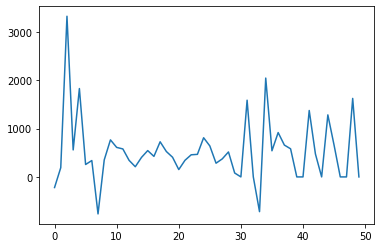

In [11]:
import matplotlib.pyplot as plt
plt.plot(a[-50:])